In [1]:
!pip install easyocr 
!pip install imutils


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\cuda\__init__.py:749: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count


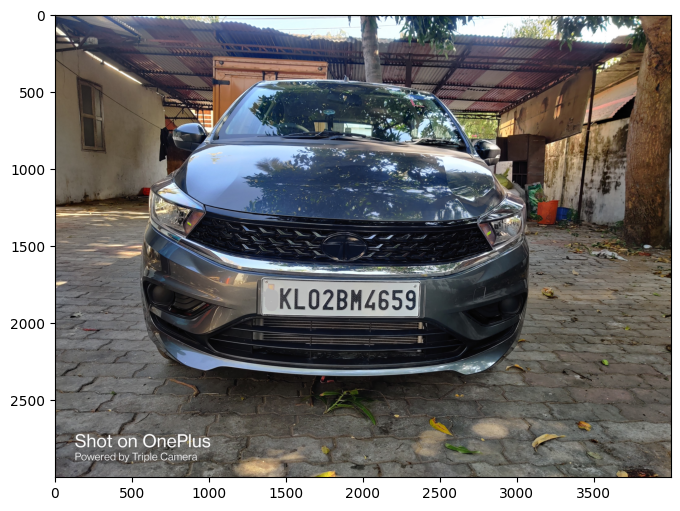

In [4]:
import cv2
from matplotlib import pyplot as plt

# Load the image from file
image_path = r'C:\Users\HP\Desktop\number_plates.jpg'
image = cv2.imread(image_path)

# Convert BGR image to RGB (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.axis('on')  # Hide axes for better visualization
plt.show()

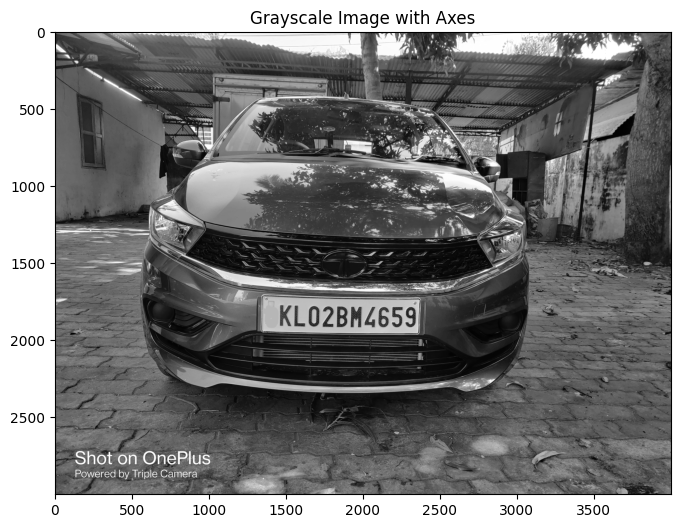

In [3]:
import cv2
import matplotlib.pyplot as plt

# File path to your image
img_path = r'C:\Users\HP\Desktop\number_plates.jpg'

# Load image using OpenCV
img = cv2.imread(img_path)

# Check if image was loaded successfully
if img is None:
    print(f'Error: Unable to load image from {img_path}')
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display grayscale image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(gray, cmap='gray')
    plt.axis('on')  # Show axes ticks and labels
    plt.title('Grayscale Image with Axes')
    plt.show()


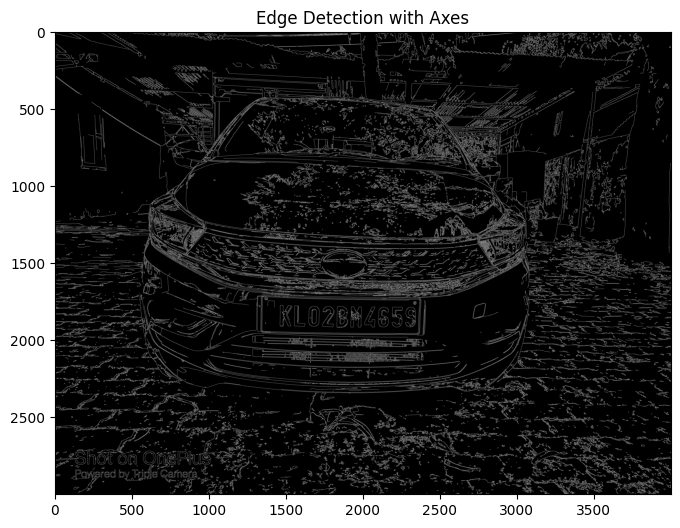

In [4]:
import cv2
import matplotlib.pyplot as plt

# New file path to your image
img_path = r'C:\Users\HP\Desktop\number_plates.jpg'

# Load image using OpenCV
img = cv2.imread(img_path)

# Check if image was loaded successfully
if img is None:
    print(f'Error: Unable to load image from {img_path}')
else:
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Reduce noise using bilateral filter
    bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

    # Perform edge detection using Canny
    edged = cv2.Canny(bfilter, 30, 200)

    # Display edge-detected image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.imshow(edged, cmap='gray')  # Display in grayscale
    plt.title('Edge Detection with Axes')
    plt.show()

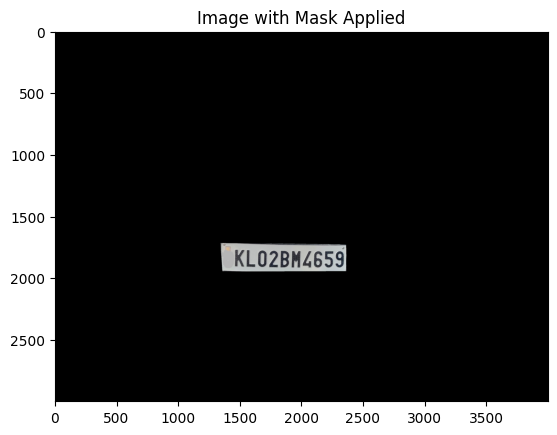

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils  # Ensure you have installed the imutils library

# File path to your image
img_path = r'C:\Users\HP\Desktop\number_plates.jpg'

# Load image using OpenCV
img = cv2.imread(img_path)

# Convert image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Reduce noise using bilateral filter
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# Perform edge detection using Canny
edged = cv2.Canny(bfilter, 30, 200)

# Find contours in the edged image
contours = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    
    # Check if the contour has 4 vertices (quadrilateral)
    if len(approx) == 4:
        location = approx
        break

# Create a mask of zeros with the same dimensions as the grayscale image
mask = np.zeros_like(gray)

# Draw contours onto the mask if location is not None
if location is not None:
    cv2.drawContours(mask, [location], -1, (255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    new_image = cv2.bitwise_and(img, img, mask=mask)

    # Display the resulting image
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.axis('on')
    plt.title('Image with Mask Applied')
    plt.show()
else:
    print("No quadrilateral contour found in the image.")


In [6]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

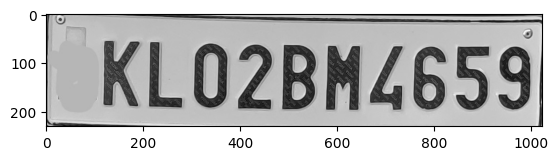

In [7]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [8]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[102, 36], [1019, 36], [1019, 219], [102, 219]],
  'KLOZBHL659',
  0.3670274508830394)]

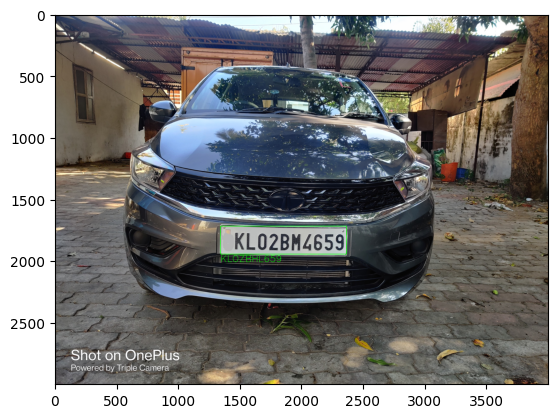

In [9]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX

# Increase fontScale for larger text
fontScale = 2.5  # Adjust this value for your desired font size

# Put text on the image
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font,
                  fontScale=fontScale, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)

# Draw rectangle around the text region
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0), 3)

# Display the image with matplotlib
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.axis('on')  # Turn off axis for cleaner display
plt.show()
